In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
df.shape

(800, 13)

### Замена значений в столбце Legendary, где True = 1, False = 0

In [13]:
dummy1 = pd.get_dummies(df['Legendary'], drop_first=True)
df = pd.concat([df, dummy1], axis=1).drop('Legendary', axis=1)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,True
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [24]:
df.rename(columns={1: 'Legendary'}, inplace=True)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    uint8 
dtypes: int64(9), object(3), uint8(1)
memory usage: 75.9+ KB


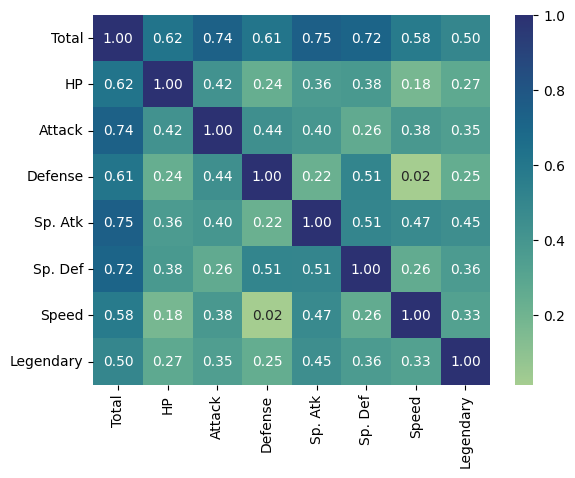

In [43]:
df_corr = df.loc[:, ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].corr()
sns.heatmap(abs(df_corr), annot=True, cmap='crest', fmt='.2f')
plt.show()

## Графики ниже показывают зависимость значений. Наиболее явная линейная зависимость между Attack и Defense. Зависимость с Total не очень полезная, так как total является суммой всех значений.  

<Figure size 300x300 with 0 Axes>

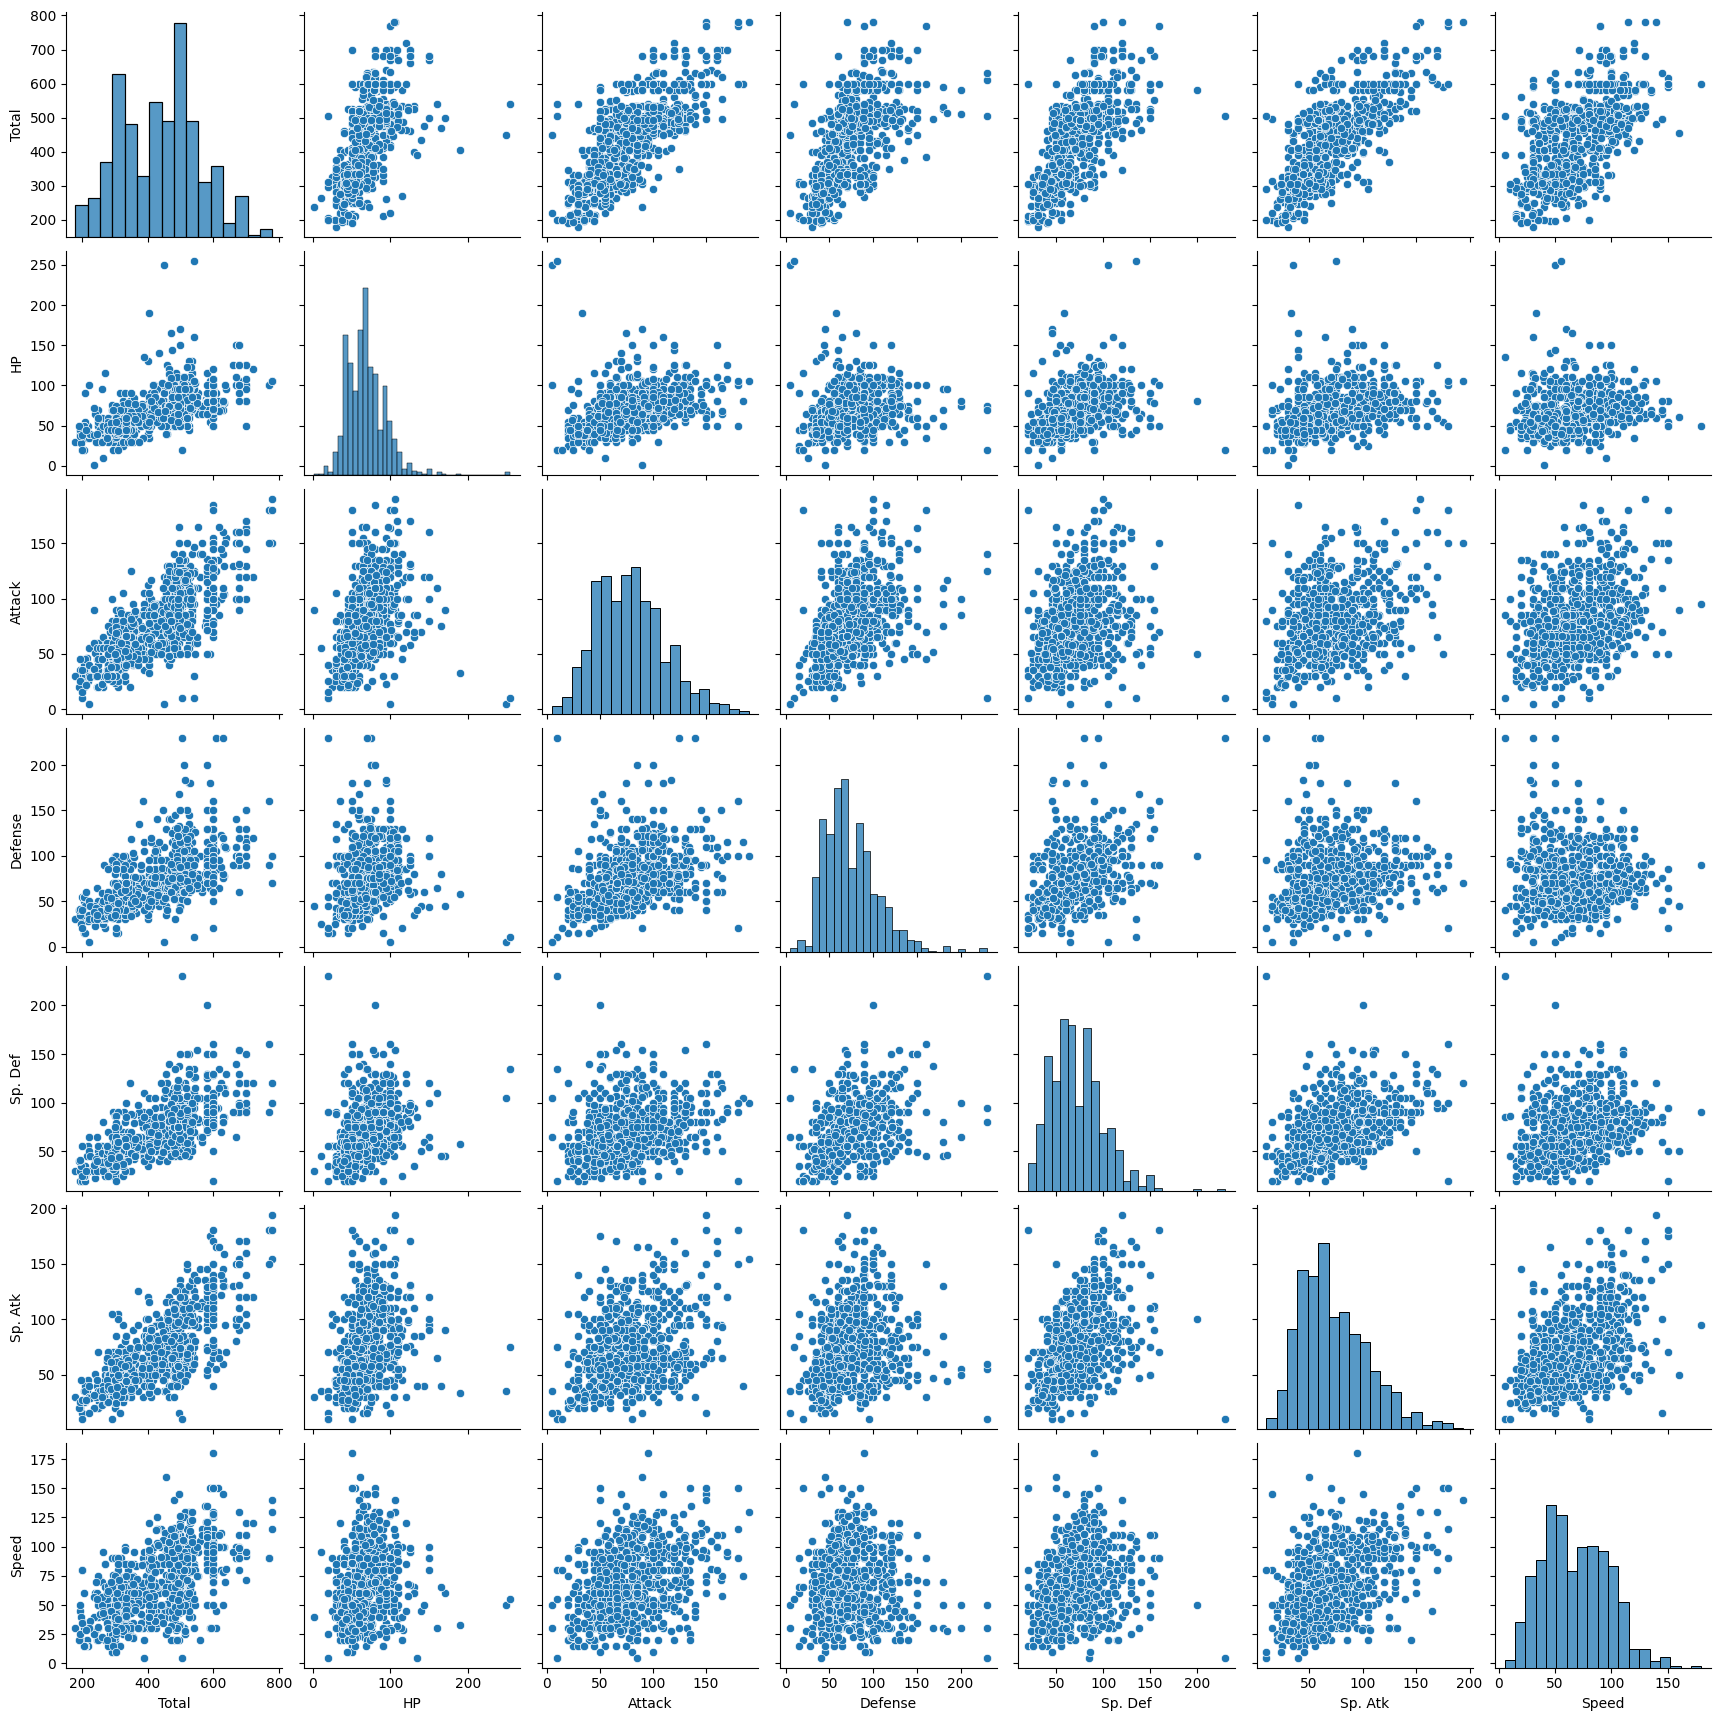

In [49]:
plt.figure(figsize=(3, 3))
sns.pairplot(data=df.loc[:,['Total', 'HP', 'Attack', 'Defense', 'Sp. Def', 'Sp. Atk', 'Speed']])
plt.show()

## Больше всего покемонов в поколении 5, что отчетливо видно на графике.

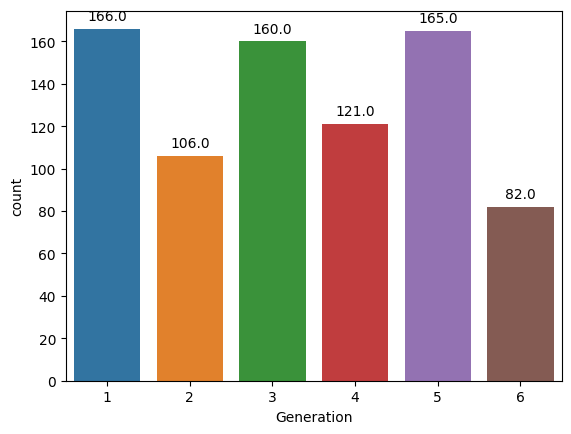

In [44]:
barplot = sns.countplot(df, x='Generation')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

## Пример графика jointplot, который отражает двумерные и одномерные данные. Зависимость между Атаками и Защитами отражает, что в основном, чем больше защита, тем больше атака.

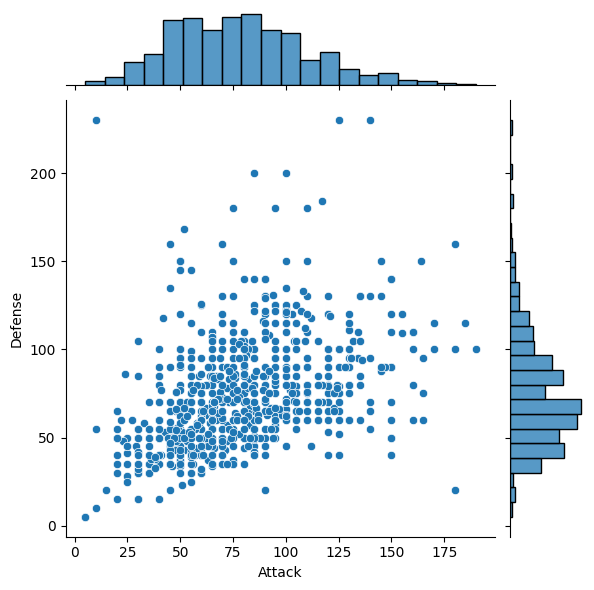

In [45]:
sns.jointplot(x='Attack', y='Defense', data=df)
plt.show()

## Зависимость между специальными атаками и защитами от специальных атак. Также прослеживается линейная зависимость между двумя переменными.

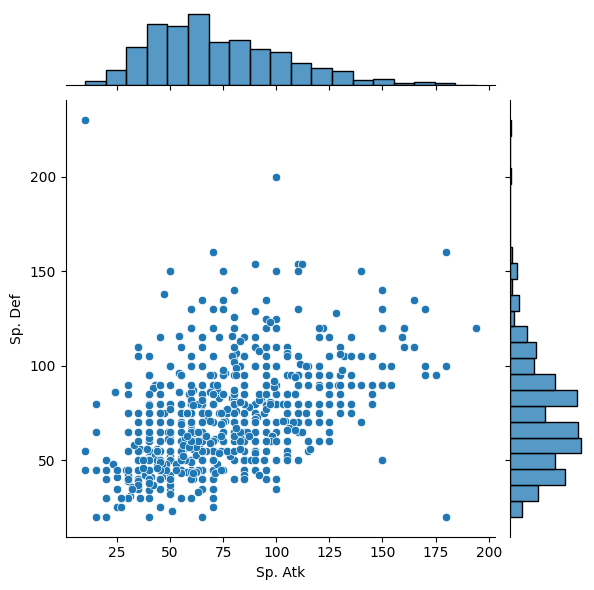

In [60]:
sns.jointplot(x='Sp. Atk', y='Sp. Def', data=df)

## BoxPlot отражает распределение какой-то переменной для каких-то значений. Например, поле total и legendary. Можно сделать вывод, что для нелегендарных покемонов общее количество очков total находится в диапазоне от 200, до 700, а для легендарных от 600 до 800. BoxPlot также показывается среднее значение, кваантили т.п.

<Axes: xlabel='Legendary', ylabel='Total'>

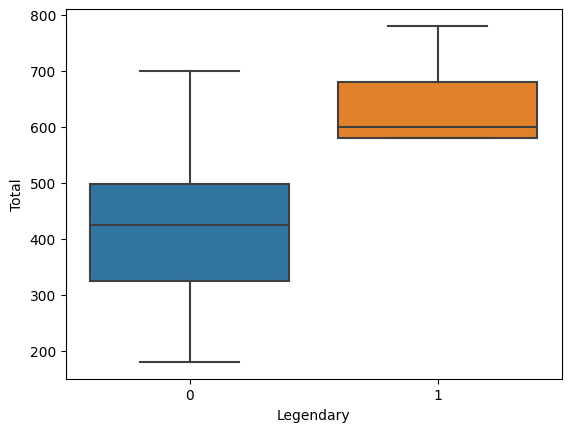

In [61]:
sns.boxplot(x='Legendary', y='Total', data=df)

## Результаты ниже подтверждают тот факт, что чем больше очков по всем столбцам и в целом очков Total, тем вероятнее, что покемон легендарный.

In [53]:
df.groupby(['Legendary'])['HP', 'Attack', 'Defense', 'Sp. Def', 'Sp. Atk', 'Speed'].mean().reset_index().sort_index(ascending=False)

C:\Users\Ксения\AppData\Local\Temp\ipykernel_33536\181539714.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Legendary'])['HP', 'Attack', 'Defense', 'Sp. Def', 'Sp. Atk', 'Speed'].mean().reset_index().sort_index(ascending=False)


,Legendary,HP,Attack,Defense,Sp. Def,Sp. Atk,Speed
1,1,92.738462,116.676923,99.661538,105.938462,122.184615,100.184615
0,0,67.182313,75.669388,71.559184,68.892517,68.454422,65.455782


In [54]:
df.groupby(['Legendary'])['Total'].mean().reset_index().sort_index(ascending=False)

,Legendary,Total
1,1,637.384615
0,0,417.213605


## Больше всего очков у четвертого поколения покемонов. Хотя приблизительно одинаковые значения у всех поколений, что видно на графике pie.

In [67]:
df_gen = df.groupby(['Generation'])['Total'].mean().reset_index().sort_values(by='Total', ascending=False)
df_gen

,Generation,Total
3,4,459.016529
5,6,436.378049
2,3,436.225000
4,5,434.987879
0,1,426.813253
1,2,418.283019


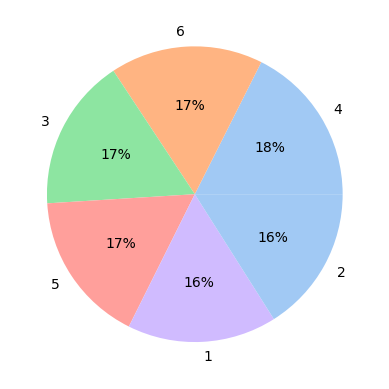

In [66]:
data = df_gen['Total']
labels = df_gen['Generation']

colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Ниже представлены среднее значение очков для каждого типа покемонов. Самое большое количество очков у покемона с типом Dragon.

In [59]:
df_types = df.groupby(['Type 1'])['Total'].mean().sort_values(ascending=False).reset_index()
df_types

,Type 1,Total
0,Dragon,550.531250
1,Steel,487.703704
2,Flying,485.000000
3,Psychic,475.947368
4,Fire,458.076923
5,Rock,453.750000
6,Dark,445.741935
7,Electric,443.409091
8,Ghost,439.562500
9,Ground,437.500000


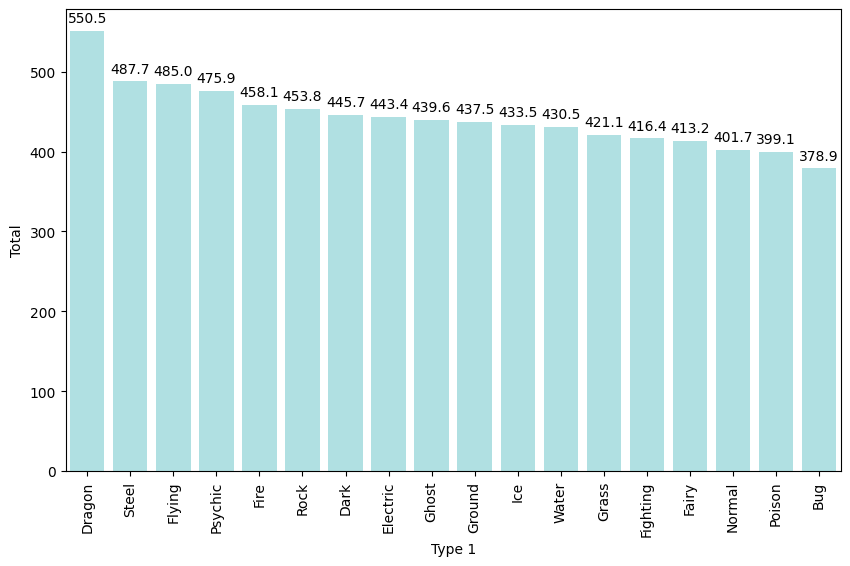

In [63]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_types, x='Type 1', y='Total', color='#A8E8EA')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)
plt.show()

## Ниже представлены BoxPlot, показывающие распределения по всем столбцам, находящимся примерно в одном диапазоне. Заметно, что средние значения для каждого из солбцов примерно равны.

C:\Users\Ксения\AppData\Local\Temp\ipykernel_24152\2928674126.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_copy = df.drop(['Total', '#', 'Legendary', 'Generation'], 1)


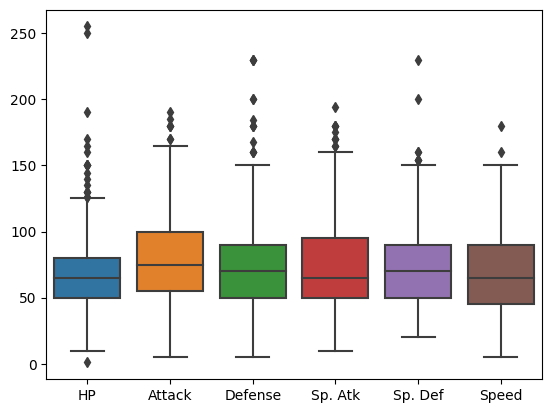

In [55]:
df_copy = df.drop(['Total', '#', 'Legendary', 'Generation'], 1)
sns.boxplot(data=df_copy)
plt.show()